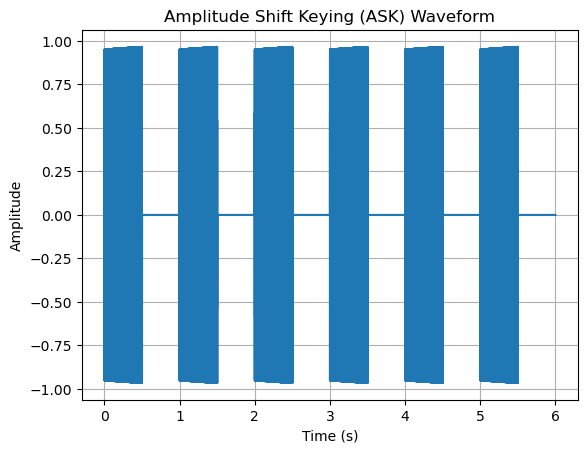

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ask_waveform(message, carrier_freq, bit_rate, sampling_rate, amplitude=10):
    """
    Generate an Amplitude Shift Keying (ASK) waveform.

    Parameters:
        message (str): The binary message to be transmitted (e.g., "101010").
        carrier_freq (float): The frequency of the carrier signal in Hz.
        bit_rate (float): The bit rate of the message in bits per second.
        sampling_rate (float): The sampling rate of the waveform in samples per second.
        amplitude (float): The amplitude of the carrier signal. Default is 1.0.

    Returns:
        tuple: A tuple containing two arrays: time array and ASK waveform array.
    """
    time_per_bit = 1 / bit_rate
    total_time = len(message) * time_per_bit
    num_samples = int(total_time * sampling_rate)
    time = np.linspace(0, total_time, num_samples)
    
    carrier_wave = amplitude * np.sin(2 * np.pi * carrier_freq * time)
    ask_waveform = []

    for bit in message:
        if bit == '0':
            ask_waveform.extend([0] * int(time_per_bit * sampling_rate))
        elif bit == '1':
            ask_waveform.extend(carrier_wave[:int(time_per_bit * sampling_rate)])

    return time, np.array(ask_waveform)

# Example usage:
if __name__ == "__main__":
    message = "101010101010"
    carrier_freq = 1000  # 1 kHz carrier frequency
    bit_rate = 2  # 2 bits per second
    sampling_rate = 10000  # 10 kHz sampling rate
    amplitude = 1.0

    time, ask_waveform = generate_ask_waveform(message, carrier_freq, bit_rate, sampling_rate, amplitude)

    # Plot the ASK waveform
    plt.figure()
    plt.plot(time, ask_waveform)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude Shift Keying (ASK) Waveform')
    plt.grid(True)
    plt.show()
